<a href="https://colab.research.google.com/github/dqminhv/fraudulent-job-posting-detection-with-NLP/blob/main/notebook/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import packages and data**

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [53]:
job_posting_us_df = pd.read_csv('https://raw.githubusercontent.com/dqminhv/fraudulent-job-posting-detection-with-NLP/main/Data/job-posting-us.csv')

# **Target variable**

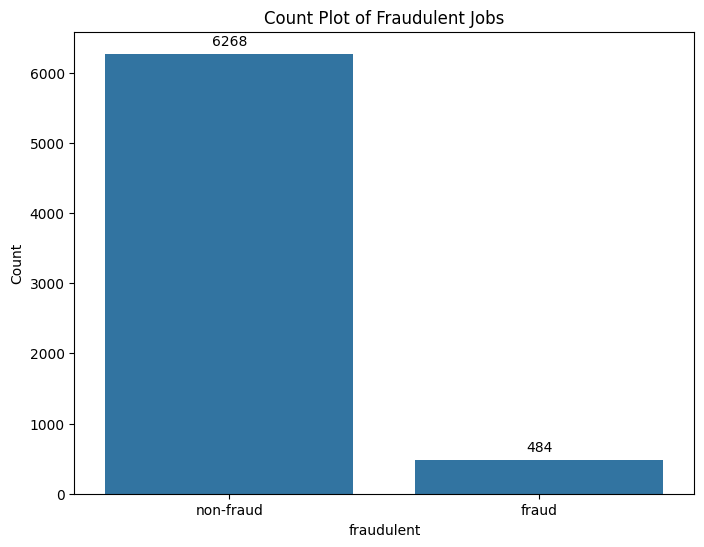

In [40]:
#Create a count plot of the target varible
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='fraudulent', data=job_posting_us_df)

# Display count values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
ax.set_xticks([0,1])
ax.set_xticklabels(['non-fraud', 'fraud'])
plt.title("Count Plot of Fraudulent Jobs")
plt.ylabel("Count")
plt.show()

In [41]:
print('Percentage of non-fraudulent job postings: {:.2f}'.format(job_posting_us_df['fraudulent'].value_counts(normalize=True)[0]*100))
print('Percentage of fraudulent job postings: {:.2f}'.format(job_posting_us_df['fraudulent'].value_counts(normalize=True)[1]*100))

Percentage of non-fraudulent job postings: 92.83
Percentage of fraudulent job postings: 7.17


**The target variable exhibits significant imbalance, which we will consider during the construction of the classification model.**

# **Features**

In [42]:
job_posting_us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6752 entries, 0 to 6751
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                6752 non-null   object
 1   location             6752 non-null   object
 2   department           6651 non-null   object
 3   salary_range         5345 non-null   object
 4   company_profile      6752 non-null   object
 5   description          6751 non-null   object
 6   requirements         6750 non-null   object
 7   benefits             6743 non-null   object
 8   telecommuting        6752 non-null   int64 
 9   has_company_logo     6752 non-null   int64 
 10  has_questions        6752 non-null   int64 
 11  employment_type      6675 non-null   object
 12  required_experience  6752 non-null   object
 13  required_education   6752 non-null   object
 14  industry             6752 non-null   object
 15  function             6514 non-null   object
 16  fraudu

In [43]:
#We split the features into two types: numerical and categorical features

#Numerical features
num_fea = ['telecommuting', 'has_company_logo', 'has_questions']

#Categorical features
cat_fea = (job_posting_us_df.columns.drop(num_fea)).drop('fraudulent')

## **Numerical features**

Numerical features includes:


*   telecommuting
*   has_company_logo
*   has_questions



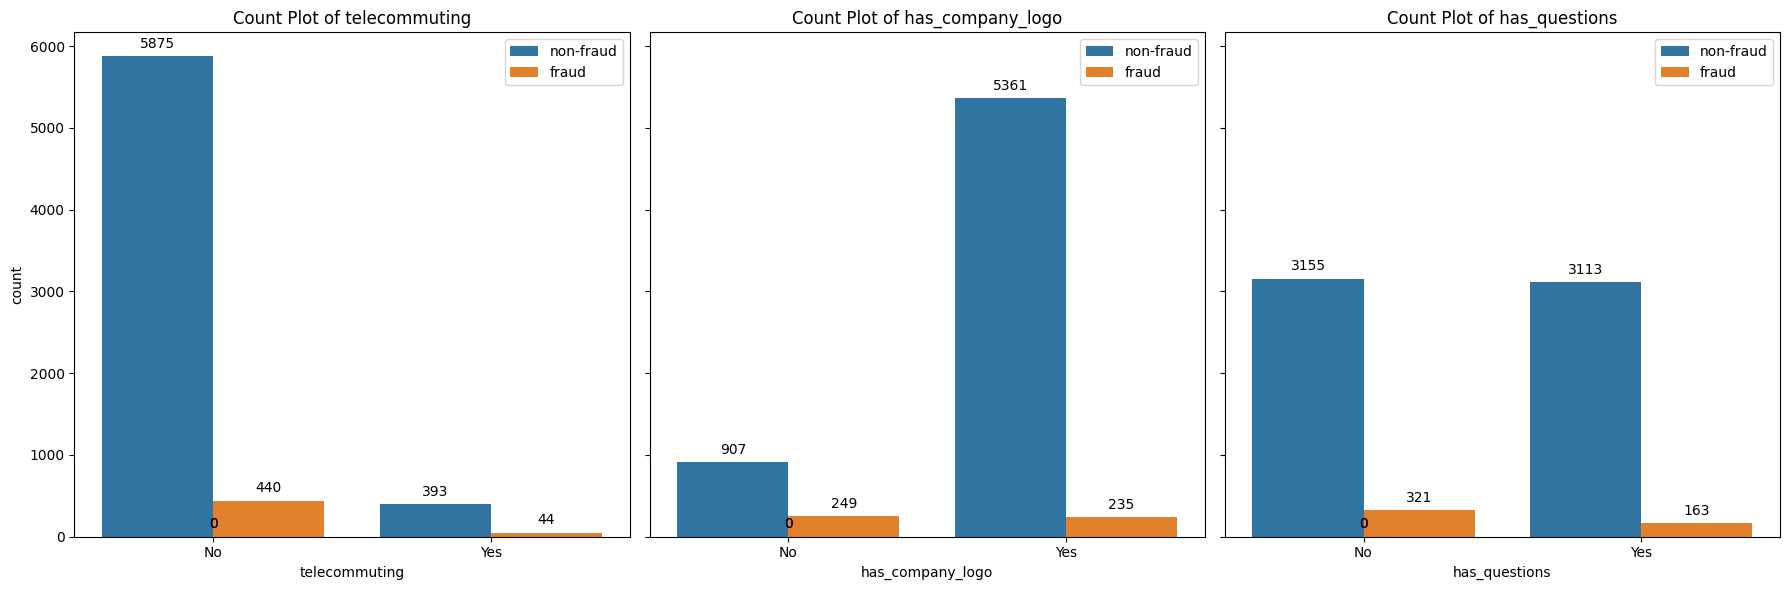

In [44]:
#Create a count plot for each feature,
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 row, 3 columns
plot = 0
for fea in num_fea:
  ax = sns.countplot(x=fea, data=job_posting_us_df, hue='fraudulent', ax=axes[plot])
  # Display count values on top of the bars
  for p in ax.patches:
      ax.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 9),
                  textcoords = 'offset points')
  ax.set_xticks([0,1])
  ax.set_xticklabels(['No', 'Yes'])
  axes[plot].set_title("Count Plot of {}".format(fea))
  axes[plot].set_xlabel(fea)
  axes[plot].legend(labels=['non-fraud', 'fraud'])
  plot += 1
plt.tight_layout()
plt.show()

**We conduct hypothesis testing to examine the association between telecommuting, company logo presence, and inclusion of questions in job postings with the target variable, fraudulent status.**

1. telecommuting

* **Null hypothesis: There is NO significant difference in target variable distribution between records with and without telecommuting work.**

* **Alt. hypothesis: There IS significant difference in target variable distribution between records with and without telecommuting work**

In [45]:
contingency_table = pd.crosstab(job_posting_us_df['telecommuting'], job_posting_us_df['fraudulent'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Feature: telecommuting, p-value: {p_value}")

# If p-value is less than significance level (e.g., 0.05), reject null hypothesis
if p_value <= 0.05:
  print(f"Reject null hypothesis for telecommuting feature: There is a significant difference in target variable distribution between records with and without telecommuting work.")
else:
  print(f"Fail to reject null hypothesis for telecommuting feature: There is no significant difference in target variable distribution between records with and without telecommuting work.")

Feature: telecommuting, p-value: 0.019569354077958512
Reject null hypothesis for telecommuting feature: There is a significant difference in target variable distribution between records with and without telecommuting work.


2. has_company_logo

* **Null hypothesis: There is NO significant difference in target variable distribution between records with and without company logo.**

* **Alt. hypothesis: There IS significant difference in target variable distribution between records with and without company logo.**

In [46]:
contingency_table = pd.crosstab(job_posting_us_df['has_company_logo'], job_posting_us_df['fraudulent'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Feature: has_company_logo, p-value: {p_value}")

# If p-value is less than significance level (e.g., 0.05), reject null hypothesis
if p_value <= 0.05:
  print(f"Reject null hypothesis for telecommuting feature: There is a significant difference in target variable distribution between records with and without company logo.")
else:
  print(f"Fail to reject null hypothesis for telecommuting feature: There is no significant difference in target variable distribution between records with and without company logo.")

Feature: has_company_logo, p-value: 1.3840036546810095e-95
Reject null hypothesis for telecommuting feature: There is a significant difference in target variable distribution between records with and without company logo.


3. has_questions

* **Null hypothesis: There is NO significant difference in target variable distribution between records with and without questions.**

* **Alt. hypothesis: There IS significant difference in target variable distribution between records with and without questions.**

In [47]:
contingency_table = pd.crosstab(job_posting_us_df['has_questions'], job_posting_us_df['fraudulent'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Feature: has_questions, p-value: {p_value}")

# If p-value is less than significance level (e.g., 0.05), reject null hypothesis
if p_value <= 0.05:
  print(f"Reject null hypothesis for telecommuting feature: There is a significant difference in target variable distribution between records with and without questions.")
else:
  print(f"Fail to reject null hypothesis for telecommuting feature: There is no significant difference in target variable distribution between records with and without questions.")

Feature: has_questions, p-value: 1.657766139664112e-11
Reject null hypothesis for telecommuting feature: There is a significant difference in target variable distribution between records with and without questions.


## **Text features**

In [ ]:
#Create a function to clean the text feature
stop=set(stopwords.words("english"))

def clean(text):
    text=text.lower()
    obj=re.compile(r"<.*?>")                     #removing html tags
    text=obj.sub(r" ",text)
    obj=re.compile(r"https://\S+|http://\S+")    #removing url
    text=obj.sub(r" ",text)
    obj=re.compile(r"[^\w\s]")                   #removing punctuations
    text=obj.sub(r" ",text)
    obj=re.compile(r"\d{1,}")                    #removing digits
    text=obj.sub(r" ",text)
    obj=re.compile(r"_+")                        #removing underscore
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s\w\s")                    #removing single character
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s{2,}")                    #removing multiple spaces
    text=obj.sub(r" ",text)
    lemmatizer = WordNetLemmatizer()
    text=[lemmatizer.lemmatize(word) for word in text.split() if word not in stop]
    return " ".join(text)

**We will implement EDA to the text features to answer the following questions**


1. What job title has the highest fraud rate?
2. What location has the highest fraud rate?
3. What employment type has the highest fraud rate?
4. What industry has the highest fraud rate?
5. What function has the highest fraud rate?
6. What salary range has the highest fraud rate?
7. What common characteristics do fraudulent job postings share in terms of company profiles, job requirements, job descriptions, and benefits?


### Job title



In [54]:
#Number of unique job title
job_posting_us_df['title'].nunique()

4141

In [49]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(job_posting_us_df['title'].apply(clean))

# Dimensionality reduction
#pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
#X_pca = pca.fit_transform(X.toarray())

# Clustering
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [50]:
job_posting_us_df['title_cluster'] = kmeans.labels_

In [51]:
# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Number of top terms to display
top_terms = 5

# Identify top terms for each cluster
for i, center in enumerate(cluster_centers):
    top_term_indices = center.argsort()[-top_terms:][::-1]
    top_terms_cluster = [feature_names[index] for index in top_term_indices]
    print(f"Cluster {i+1}: {', '.join(top_terms_cluster)}")

Cluster 1: teacher, abroad, conversational, english, graduate
Cluster 2: sale, representative, inside, executive, professional
Cluster 3: customer, service, associate, part, time
Cluster 4: assistant, administrative, executive, office, manager
Cluster 5: director, senior, engineer, software, sale
Cluster 6: client, delivery, service, manager, professional
Cluster 7: engineer, specialist, designer, marketing, software
Cluster 8: manager, project, marketing, account, product
Cluster 9: developer, web, end, senior, java
Cluster 10: business, development, analyst, manager, director


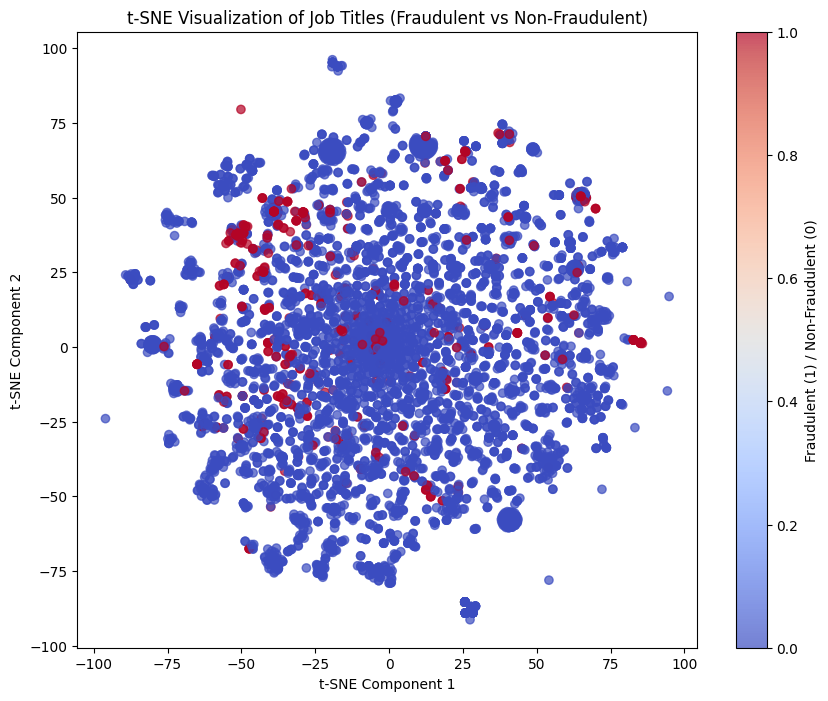

In [58]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(X.toarray())
labels = job_posting_us_df['fraudulent']

# Plot the t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
plt.title('t-SNE Visualization of Job Titles (Fraudulent vs Non-Fraudulent)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Fraudulent (1) / Non-Fraudulent (0)')
plt.show()

### Location

In [55]:
job_posting_us_df['location'].nunique()

1174

### Employment type

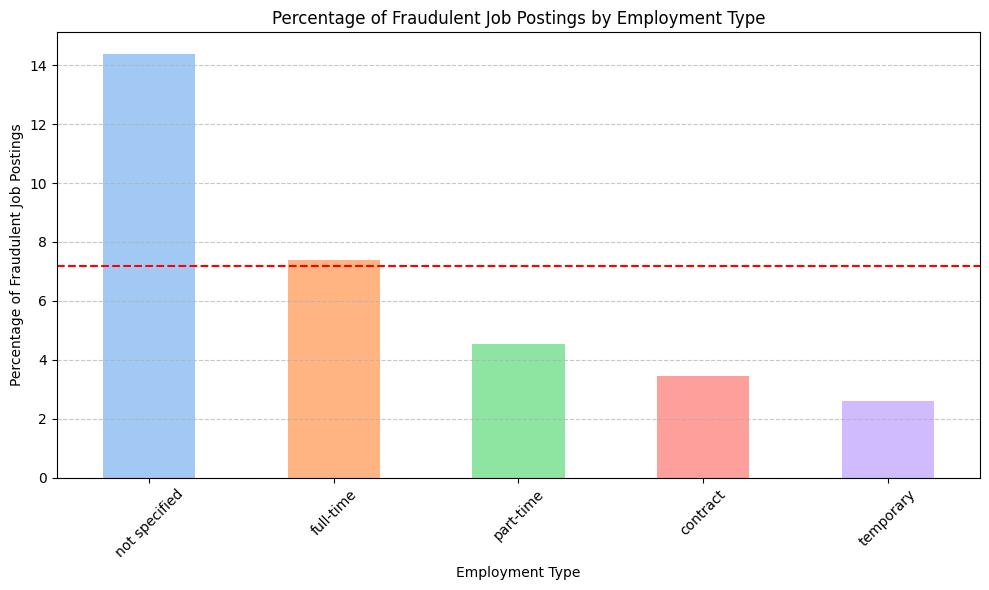

In [71]:
# Calculate percentage of fraudulent job postings for each employment type
fraudulent_percentage = job_posting_us_df.groupby('employment_type')['fraudulent'].mean() * 100

# Plot the percentages
plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel')
fraudulent_percentage.sort_values(ascending=False).plot(kind='bar', color=colors)
overall_average_fraudulent_rate = job_posting_us_df['fraudulent'].mean() * 100
plt.axhline(y=overall_average_fraudulent_rate, color='red', linestyle='--', label=f'Overall Avg ({overall_average_fraudulent_rate:.2f}%)')
plt.title('Percentage of Fraudulent Job Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Percentage of Fraudulent Job Postings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [70]:
fraudulent_percentage.sort_values()

required_experience
executive            2.816901
associate            3.056426
mid-senior level     5.838580
internship           5.970149
director             6.938776
entry level          9.000552
not specified       10.422343
Name: fraudulent, dtype: float64

### Required experience

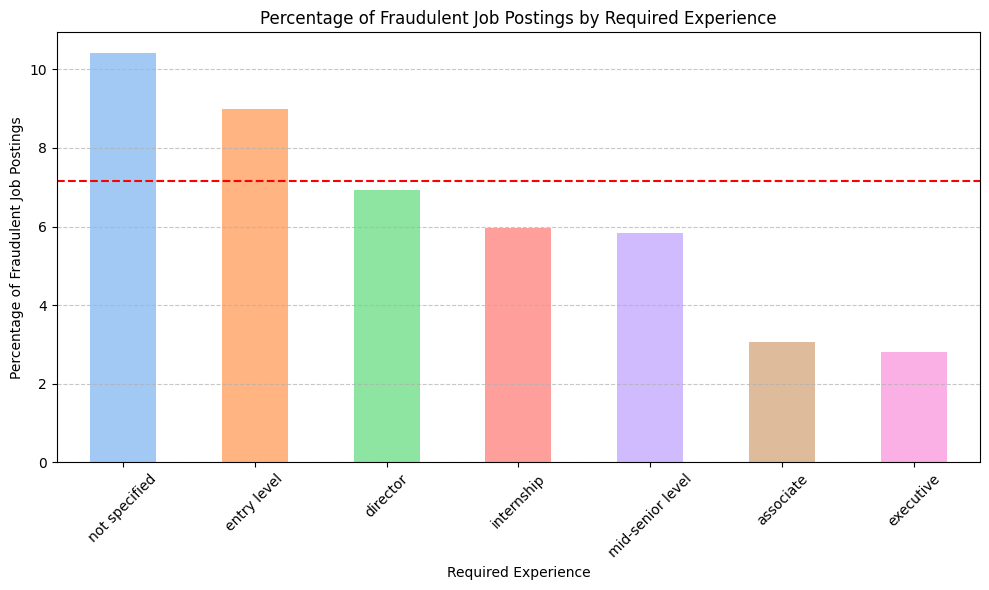

In [72]:
# Calculate percentage of fraudulent job postings for each require experience category
fraudulent_percentage = job_posting_us_df.groupby('required_experience')['fraudulent'].mean() * 100

# Plot the percentages
plt.figure(figsize=(10, 6))
fraudulent_percentage.sort_values(ascending=False).plot(kind='bar', color=colors)
overall_average_fraudulent_rate = job_posting_us_df['fraudulent'].mean() * 100
plt.axhline(y=overall_average_fraudulent_rate, color='red', linestyle='--', label=f'Overall Avg ({overall_average_fraudulent_rate:.2f}%)')
plt.title('Percentage of Fraudulent Job Postings by Required Experience')
plt.xlabel('Required Experience')
plt.ylabel('Percentage of Fraudulent Job Postings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

### Industry

In [77]:
 job_posting_us_df['industry'].nunique()

125

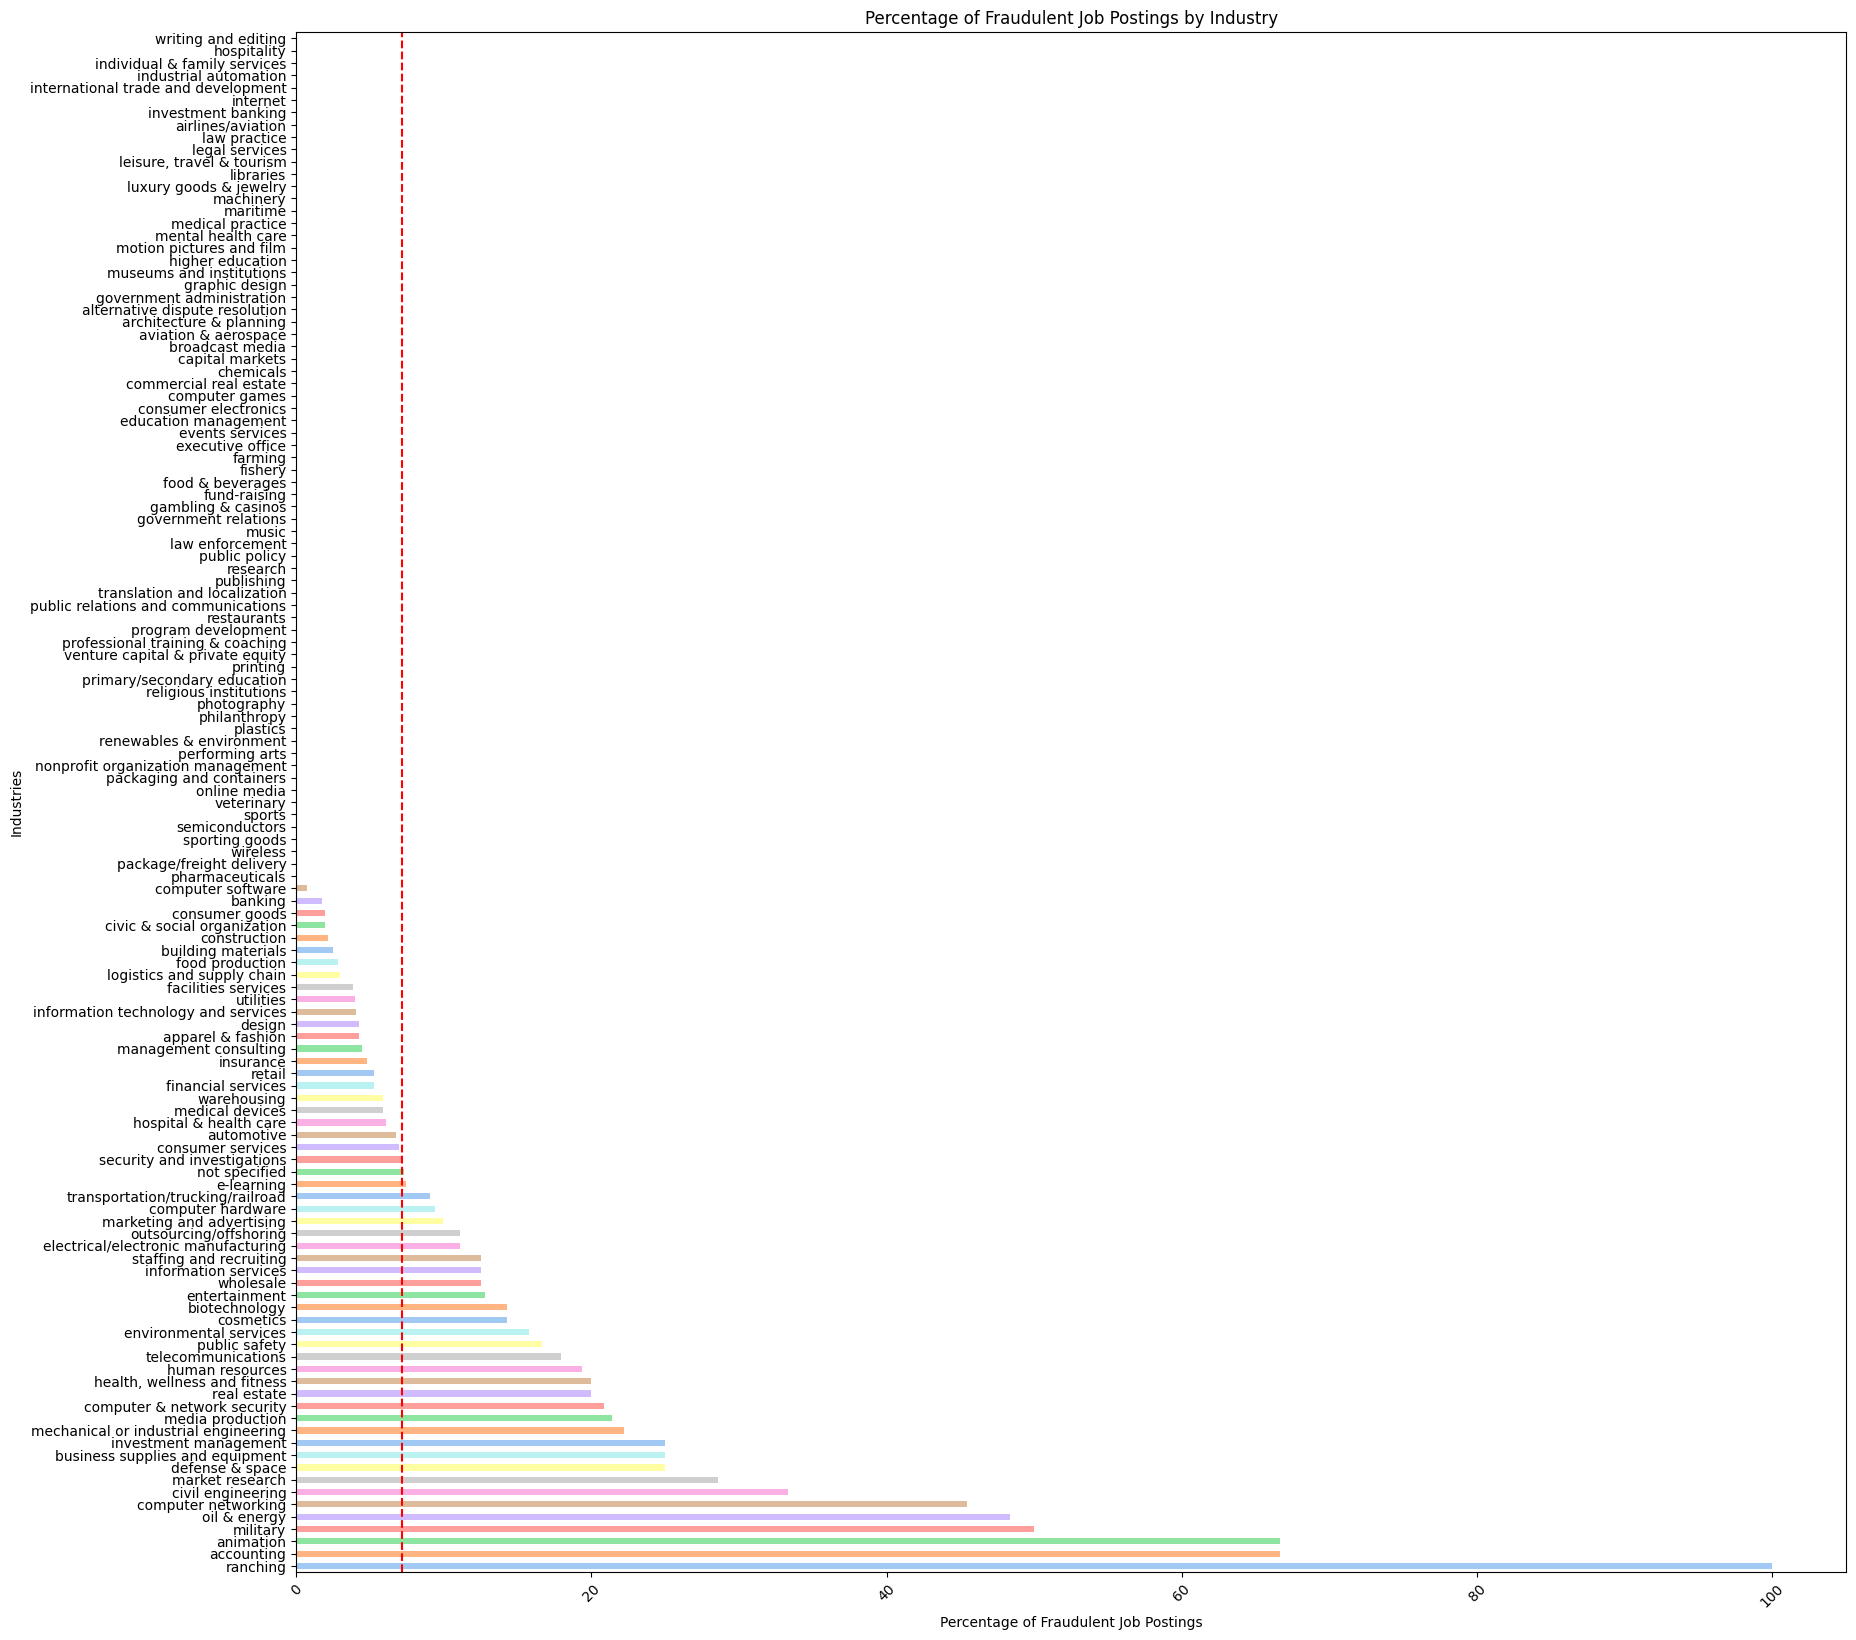

In [81]:
# Calculate percentage of fraudulent job postings for each require experience category
fraudulent_percentage = job_posting_us_df.groupby('industry')['fraudulent'].mean() * 100

# Plot the percentages
plt.figure(figsize=(20, 20))
fraudulent_percentage.sort_values(ascending=False).plot(kind='barh', color=colors)
overall_average_fraudulent_rate = job_posting_us_df['fraudulent'].mean() * 100
plt.axvline(x=overall_average_fraudulent_rate, color='red', linestyle='--', label=f'Overall Avg ({overall_average_fraudulent_rate:.2f}%)')
plt.title('Percentage of Fraudulent Job Postings by Industry')
plt.xlabel('Percentage of Fraudulent Job Postings')
plt.ylabel('Industries')
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

### Function

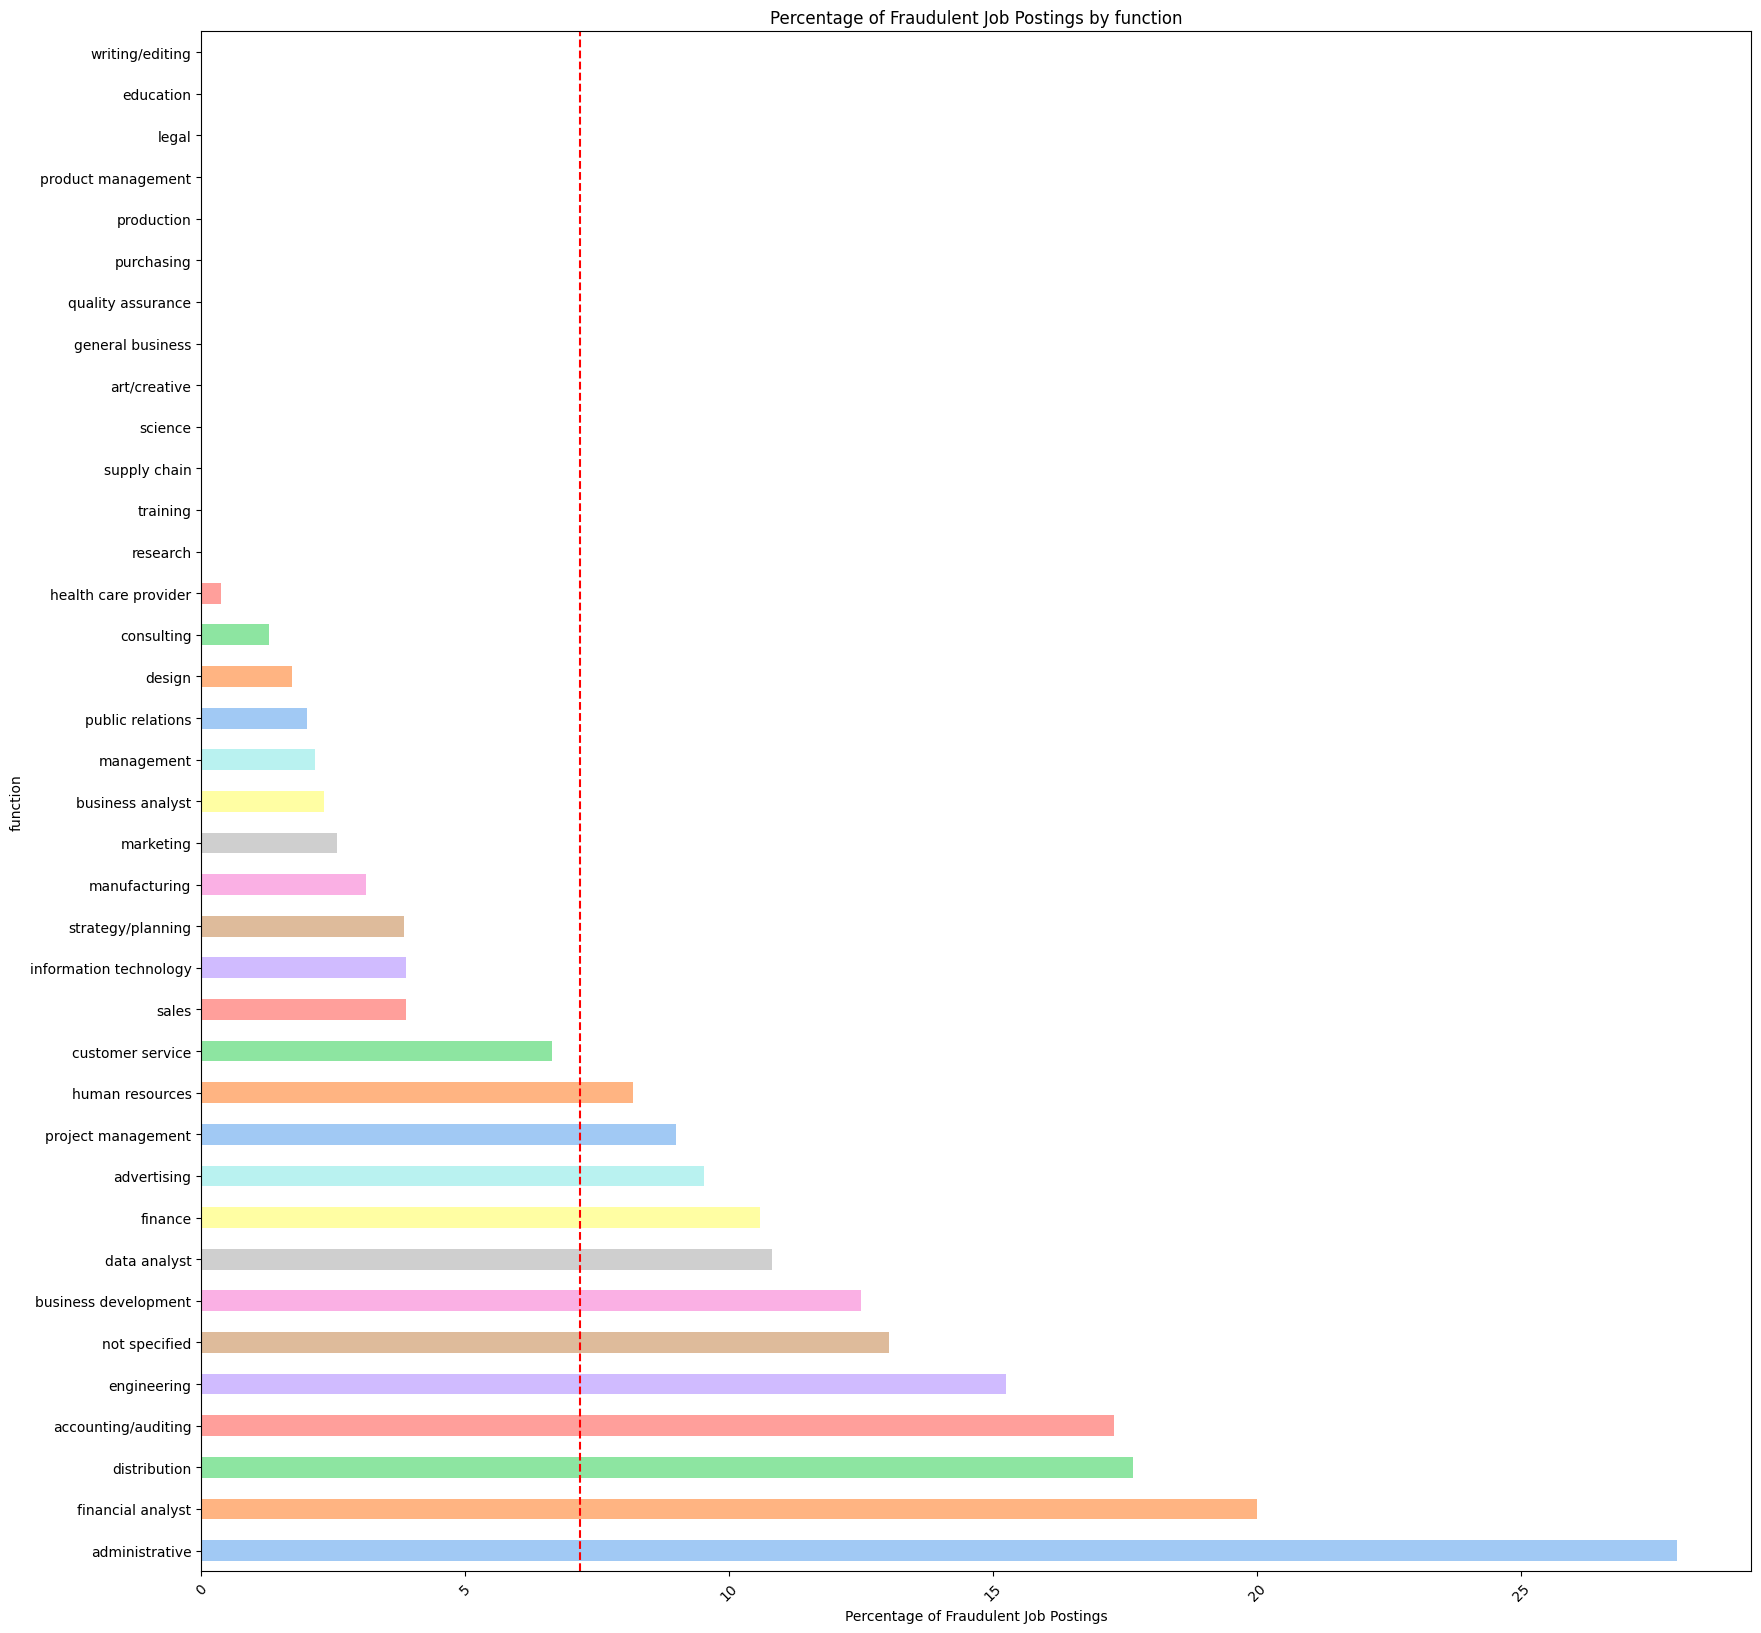

In [83]:
# Calculate percentage of fraudulent job postings for each require experience category
fraudulent_percentage = job_posting_us_df.groupby('function')['fraudulent'].mean() * 100

# Plot the percentages
plt.figure(figsize=(20, 20))
fraudulent_percentage.sort_values(ascending=False).plot(kind='barh', color=colors)
overall_average_fraudulent_rate = job_posting_us_df['fraudulent'].mean() * 100
plt.axvline(x=overall_average_fraudulent_rate, color='red', linestyle='--', label=f'Overall Avg ({overall_average_fraudulent_rate:.2f}%)')
plt.title('Percentage of Fraudulent Job Postings by function')
plt.xlabel('Percentage of Fraudulent Job Postings')
plt.ylabel('function')
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

### Salary range